<h1><font color= red><center>California House Prices</center></font></h1>


#### <h2><font color = blue><center>About my dataset</center></font></h2>

<font color = darkblue><I>I am using the 2017 property dataset from Zillow dataset from Kaggle competitions, this dataset only features <B>homes that were sold in 2017.</B> This dataset contains millions of rows with over fifty columns each filled with data based on home purchased in locations around the world and were sold between January and September of 2017.  Inside I was able to find the prices homes were sold at, the square footage they had, how many bedrooms each home had and much much more. You can find out more on this dataset <a href= "https://www.kaggle.com/c/zillow-prize-1/data">here</a></I></font>

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
%matplotlib inline

plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 14})

In [4]:
zillow_dataset = pd.read_csv('properties_2017.csv')

C:\Users\blindside\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<h2><font color = blue><center>Explore the data</center></font></h2>

In [5]:
zillow_dataset_cols = ["bathroomcnt", "bedroomcnt", "calculatedfinishedsquarefeet",
                       "landtaxvaluedollarcnt", "lotsizesquarefeet","regionidzip",
                       "structuretaxvaluedollarcnt", "yearbuilt"]
zillow_subset = zillow_dataset[zillow_dataset_cols]

In [6]:
#Dropping rows with NAs
zillow_subset = zillow_subset.dropna(axis = 0, how = 'any')

In [7]:
#Made new columns to get the total value of home, and to get price per sq ft of home and the land
zillow_subset['total_value'] = (zillow_subset.loc[:,('landtaxvaluedollarcnt')] + 
                            zillow_subset.loc[:,('structuretaxvaluedollarcnt')])
zillow_subset['price_per_sqft_house'] = (zillow_subset.loc[:,('structuretaxvaluedollarcnt')] / 
                            zillow_subset.loc[:,('calculatedfinishedsquarefeet')])
zillow_subset['price_per_sqft_land'] = (zillow_subset.loc[:,('landtaxvaluedollarcnt')] / 
                            zillow_subset.loc[:,('lotsizesquarefeet')])

In [8]:
#Dropping rows with zeros
zillow_subset= zillow_subset[(zillow_subset.T != 0).all(axis=0)]

In [54]:
zillow_subset.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,landtaxvaluedollarcnt,lotsizesquarefeet,regionidzip,structuretaxvaluedollarcnt,yearbuilt,total_value,price_per_sqft_house,price_per_sqft_land
20,2.0,4.0,3633.0,74104.0,9826.0,97329.0,222321.0,2005.0,296425.0,61.194880,7.541624
28,4.0,5.0,2865.0,559520.0,4990.0,96124.0,271704.0,1972.0,831224.0,94.835602,112.128257
30,2.0,2.0,1090.0,124671.0,40247.0,96072.0,232897.0,2004.0,357568.0,213.666972,3.097647
33,2.0,3.0,2077.0,436568.0,6490.0,96152.0,210192.0,1926.0,646760.0,101.199807,67.267797
45,2.0,4.0,1931.0,99828.0,5420.0,96018.0,124789.0,1957.0,224617.0,64.624029,18.418450


#### <font color = lightblue><B><I>My Variables</I></B></font>

In [10]:
total_value = zillow_subset.total_value
bathrooms = zillow_subset.bedroomcnt
bedrooms = zillow_subset.bathroomcnt
lot_sqft = zillow_subset.lotsizesquarefeet
finished_sqft = zillow_subset.calculatedfinishedsquarefeet
zip_code = zillow_subset.regionidzip
year_built = zillow_subset.yearbuilt
land_value = zillow_subset.landtaxvaluedollarcnt

In [83]:
zillow_subset.describe()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,landtaxvaluedollarcnt,lotsizesquarefeet,regionidzip,structuretaxvaluedollarcnt,yearbuilt,total_value,price_per_sqft_house,price_per_sqft_land
count,2.650105e+06,2.650105e+06,2.650105e+06,2.650105e+06,2.650105e+06,2.650105e+06,2.650105e+06,2.650105e+06,2.650105e+06,2.650105e+06,2.650105e+06
mean,2.312425e+00,3.281220e+00,1.835003e+03,2.667751e+05,2.233466e+04,9.652595e+04,1.759418e+05,1.962443e+03,4.427169e+05,8.997601e+01,3.768982e+01
std,1.014256e+00,1.118327e+00,1.114386e+03,4.425021e+05,2.508225e+05,3.777751e+03,2.310218e+05,2.293644e+01,6.146872e+05,4.252497e+02,6.096113e+01
min,5.000000e-01,1.000000e+00,1.000000e+00,9.000000e+00,1.040000e+02,9.598200e+04,9.000000e+00,1.801000e+03,1.800000e+01,2.592166e-03,8.946390e-04
25%,2.000000e+00,3.000000e+00,1.238000e+03,7.781900e+04,5.694000e+03,9.617100e+04,7.844900e+04,1.950000e+03,1.909440e+05,5.549877e+01,7.403170e+00
50%,2.000000e+00,3.000000e+00,1.601000e+03,1.756160e+05,7.000000e+03,9.636800e+04,1.274730e+05,1.961000e+03,3.230350e+05,8.172572e+01,2.348303e+01
75%,3.000000e+00,4.000000e+00,2.176000e+03,3.282000e+05,9.850000e+03,9.696400e+04,2.041620e+05,1.979000e+03,5.177760e+05,1.119150e+02,4.659219e+01
max,3.200000e+01,2.500000e+01,9.525760e+05,7.766510e+07,3.710005e+08,3.996750e+05,6.366244e+07,2.016000e+03,9.018846e+07,4.177700e+05,4.835972e+03


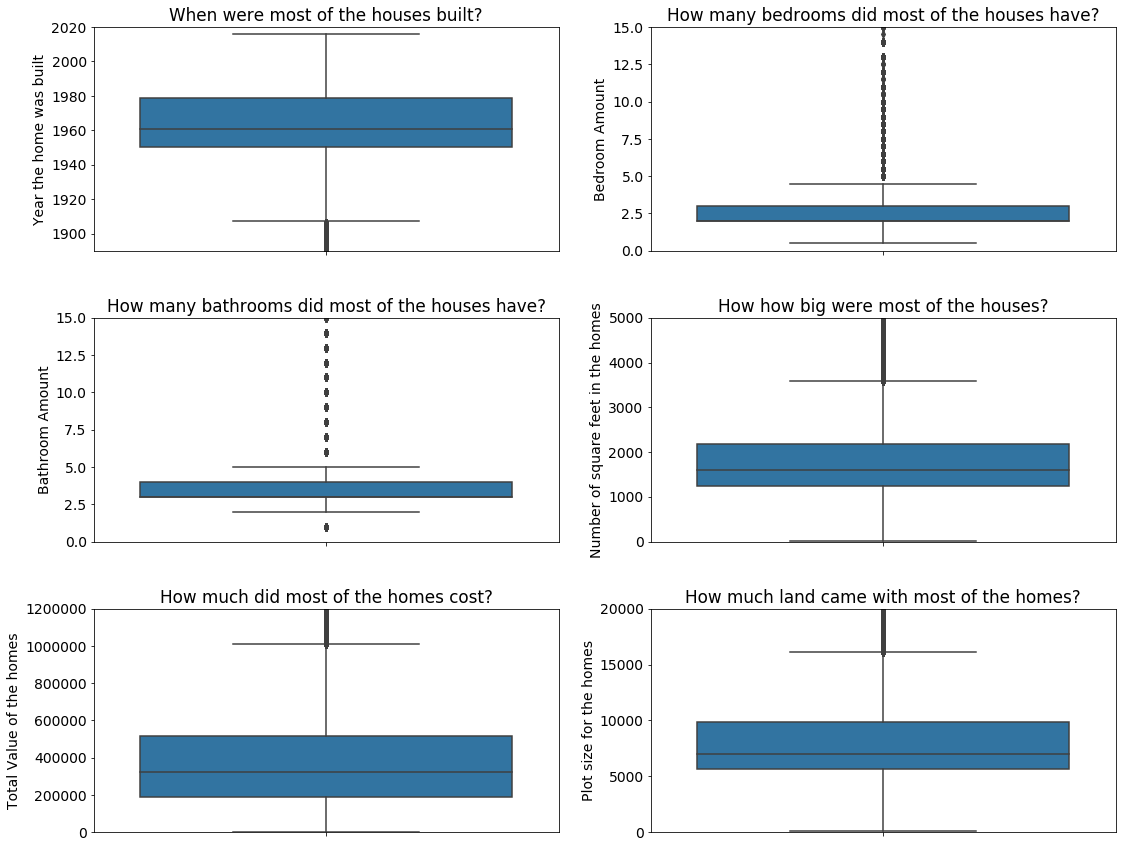

In [11]:
plt.figure(figsize=(16, 12))
plt.subplot(3, 2, 1)
sns.boxplot(y= year_built)
plt.ylim(1890, 2020)
plt.title('When were most of the houses built?')
plt.ylabel('Year the home was built')

plt.subplot(3, 2, 2)
sns.boxplot(y= bedrooms)
plt.ylim(0, 15)
plt.title('How many bedrooms did most of the houses have?')
plt.ylabel('Bedroom Amount')

plt.subplot(3, 2, 3)
sns.boxplot(y= bathrooms)
plt.ylim(0, 15)
plt.title('How many bathrooms did most of the houses have?')
plt.ylabel('Bathroom Amount')

plt.subplot(3, 2, 4)
sns.boxplot(y= finished_sqft)
plt.ylim(0, 5000)
plt.title('How how big were most of the houses?')
plt.ylabel('Number of square feet in the homes')

plt.subplot(3, 2, 5)
sns.boxplot(y =total_value)
plt.ylim(0, 1200000)
plt.title('How much did most of the homes cost?')
plt.ylabel('Total Value of the homes')

plt.subplot(3, 2, 6)
sns.boxplot(y= lot_sqft)
plt.ylim(0, 20000)
plt.title('How much land came with most of the homes?')
plt.ylabel('Plot size for the homes')
plt.tight_layout()
plt.show()

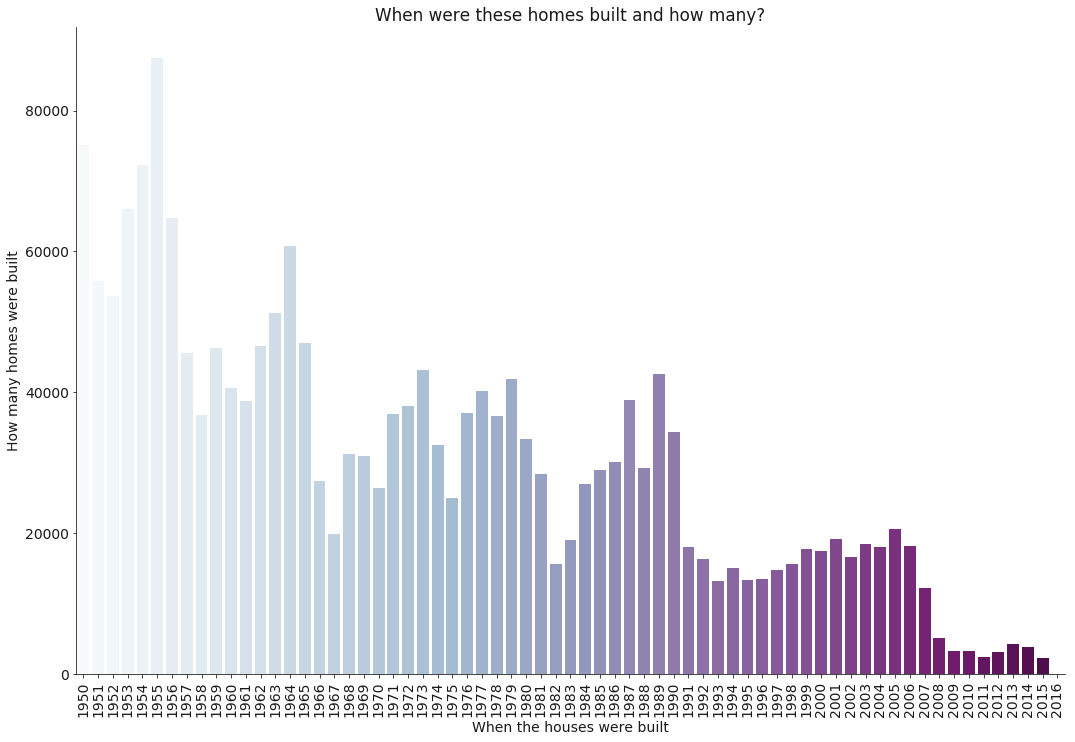

In [27]:
sns.factorplot(x="yearbuilt", data=zillow_subset, kind="count",
               palette="BuPu", size=10, aspect=1.5, order=np.arange(1950, 2017))
plt.xticks(rotation = 90)
plt.title('When were these homes built and how many?')
plt.xlabel('When the houses were built')
plt.ylabel('How many homes were built')
plt.show()

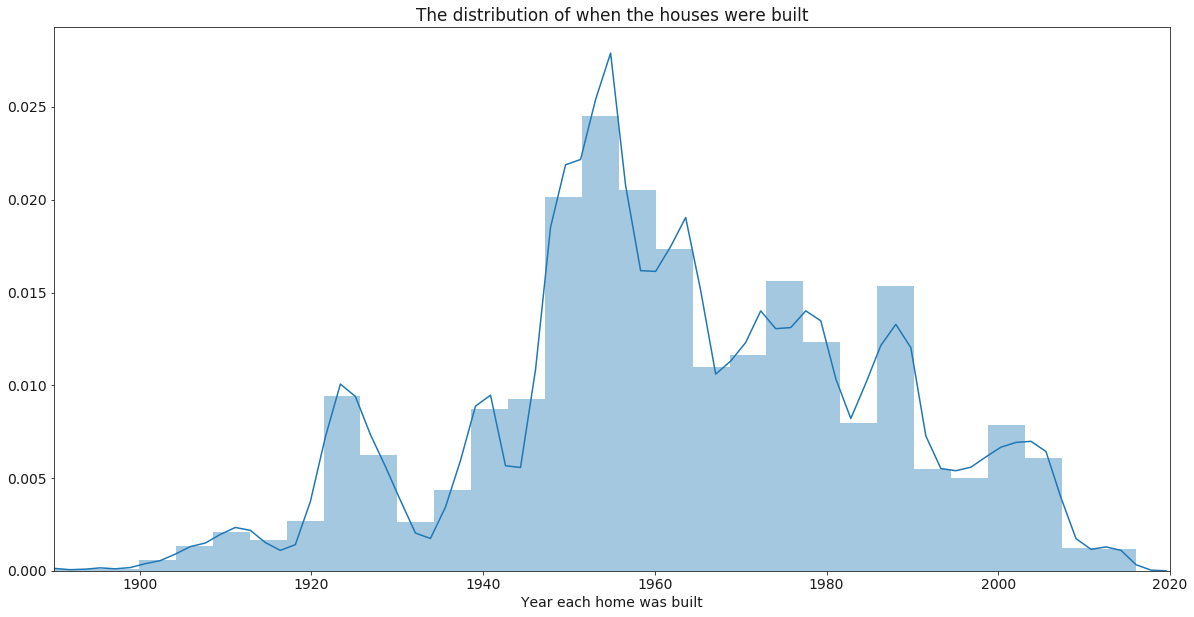

In [35]:
sns.distplot(year_built)
plt.xlim(1890, 2020)
plt.title('The distribution of when the houses were built')
plt.xlabel('Year each home was built')
plt.show()

<h2><font color = blue><center>Analytic Questions</center></font></h2>

### <font color = darkblue><B>How much does the year a house is built affect the price?</B></font>

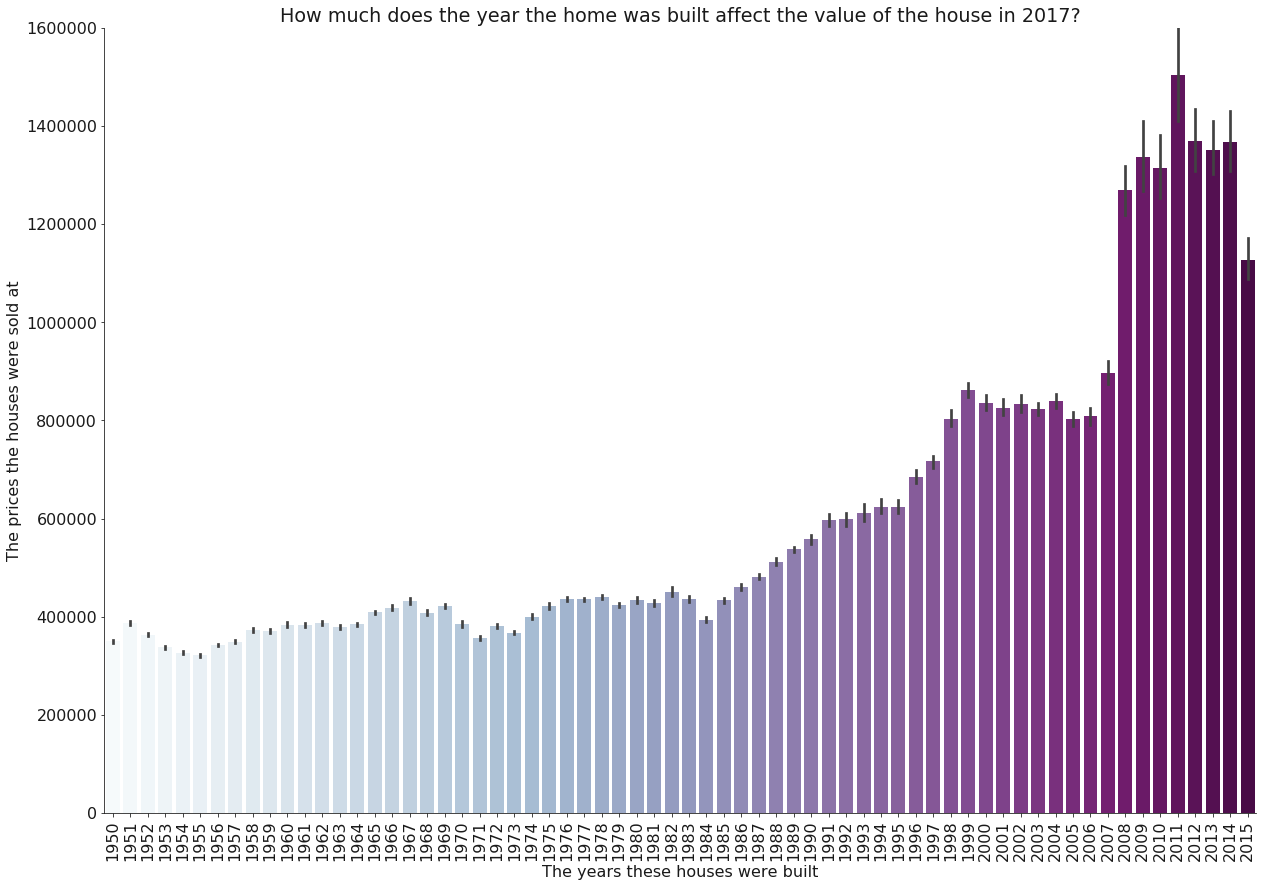

In [13]:
sns.factorplot(x="yearbuilt", y= 'total_value', data=zillow_subset, kind="bar",
               palette="BuPu", size=12, aspect=1.5, order=np.arange(1950, 2016))
plt.ylim(0, 1600000, 200000)
plt.xticks(rotation = 90)
plt.title('Does the year the home was built affect the value of the house in 2017?')
plt.xlabel('The years these houses were built')
plt.ylabel('The prices the houses were sold at')
plt.show()

<font color = #800000><I>I was actually surprised to see there was such a radical difference. The houses built after 2007 ended up being significantly more expensive than the other houses. I ended up cutting out the 2016 homes, the small number (61) I had was not consistant with the results of the data and I did not have confidence in the house totals from that year. I believe one of the contributors of the high cost could be because of the shortage of newer homes in the market. Of the houses purchased during this time, there were far less homes built after 2007. Which is probably not surprising after the financial crisis that happened during that time. After seeing the great difference in homes build in the last decade, it led me to ask another question.</I></font>

### <font color = darkblue><B><I>After seeing the huge jump in prices after 2007, is the price hike only because of the age in homes, or is there more to it?</I></B></font>

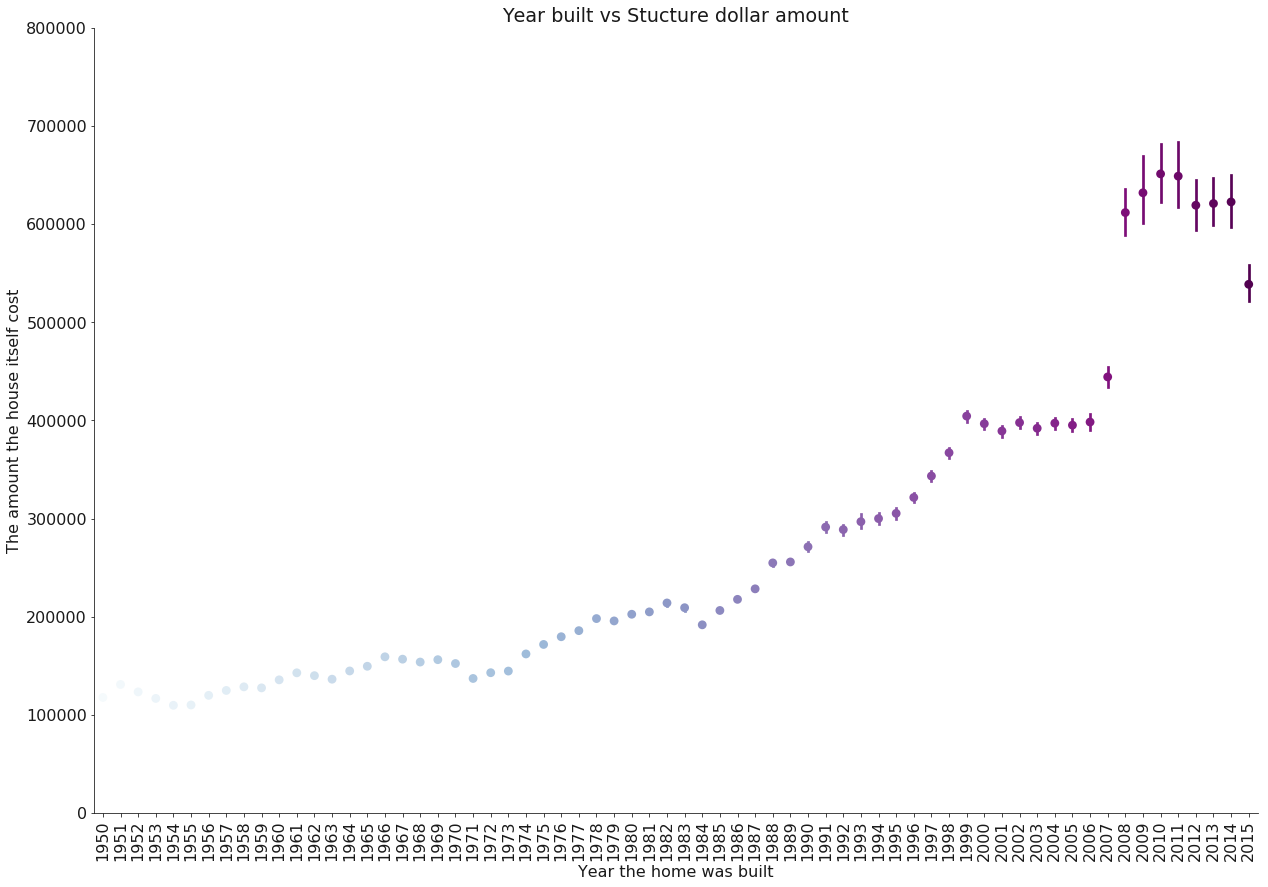

In [12]:
sns.factorplot(x="yearbuilt", y= 'structuretaxvaluedollarcnt', data=zillow_subset, kind="point",
               palette="BuPu", size=12, aspect=1.5, order=np.arange(1950, 2016))
plt.ylim(0, 800000, 100000)
plt.xticks(rotation = 90)
plt.title('Year built vs Stucture dollar amount')
plt.xlabel('Year the home was built')
plt.ylabel('The amount the house itself cost')
plt.show()

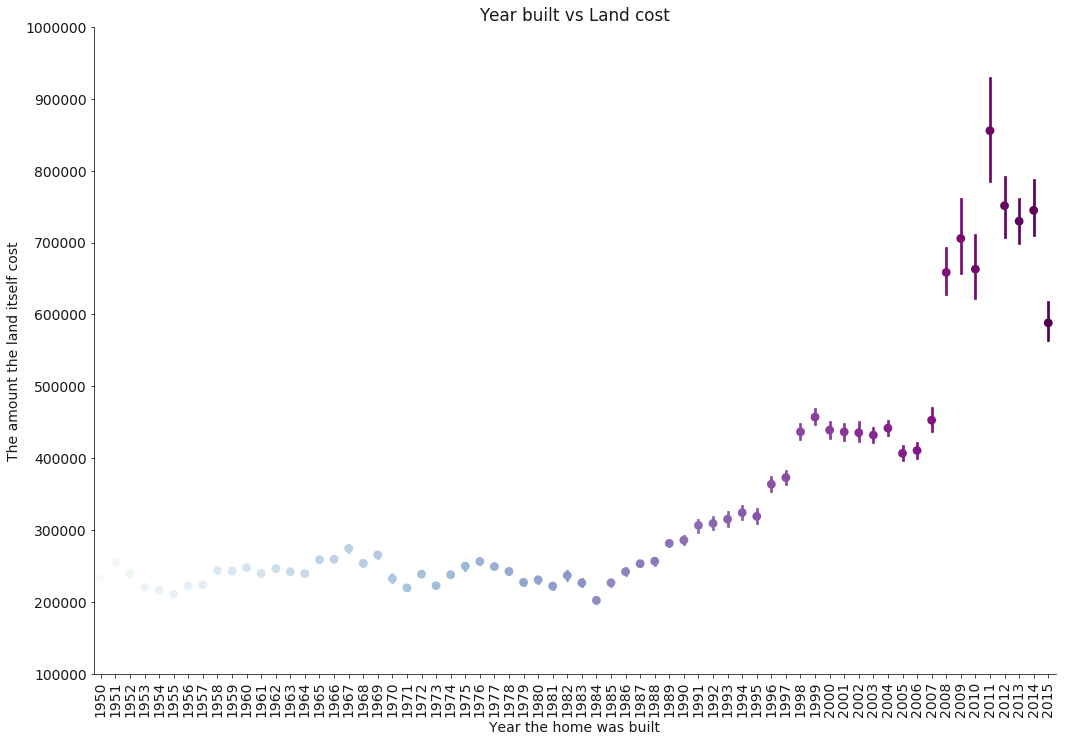

In [42]:
sns.factorplot(x="yearbuilt", y= 'landtaxvaluedollarcnt', data=zillow_subset, kind="point",
               palette="BuPu", size=10, aspect=1.5, order=np.arange(1950, 2016))
plt.ylim(100000, 1000000, 100000)
plt.title('Year built vs Land cost')
plt.xlabel('Year the home was built')
plt.ylabel('The amount the land itself cost')
plt.xticks(rotation = 90)
plt.show()

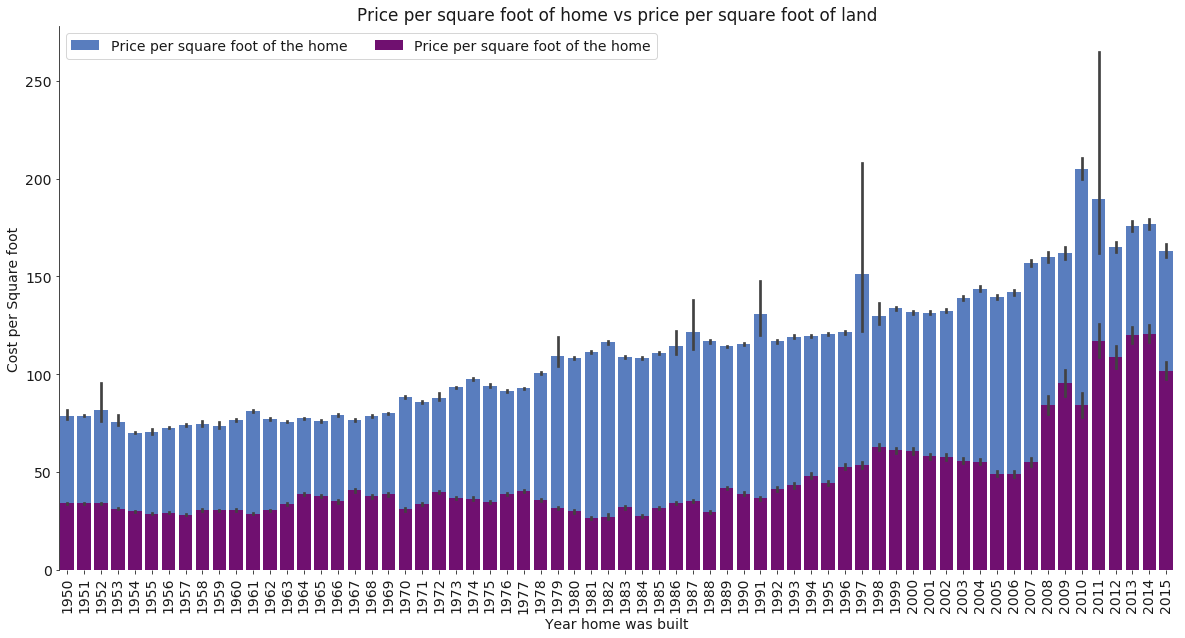

In [65]:
sns.barplot(x='yearbuilt', y="price_per_sqft_house", data=zillow_subset,
            label="Price per square foot of the home", color="b", order=np.arange(1950, 2016))

sns.barplot(x='yearbuilt', y="price_per_sqft_land", data=zillow_subset,
            label="Price per square foot of the land", color="purple", order=np.arange(1950, 2016))

plt.legend(ncol=2, loc="upper left", frameon=True)
plt.title('Price per square foot of home vs price per square foot of land')
plt.xlabel("Year home was built")
plt.ylabel("Cost per Square foot")
plt.xticks(rotation = 90)
sns.despine(left=False, bottom=True)
plt.show()

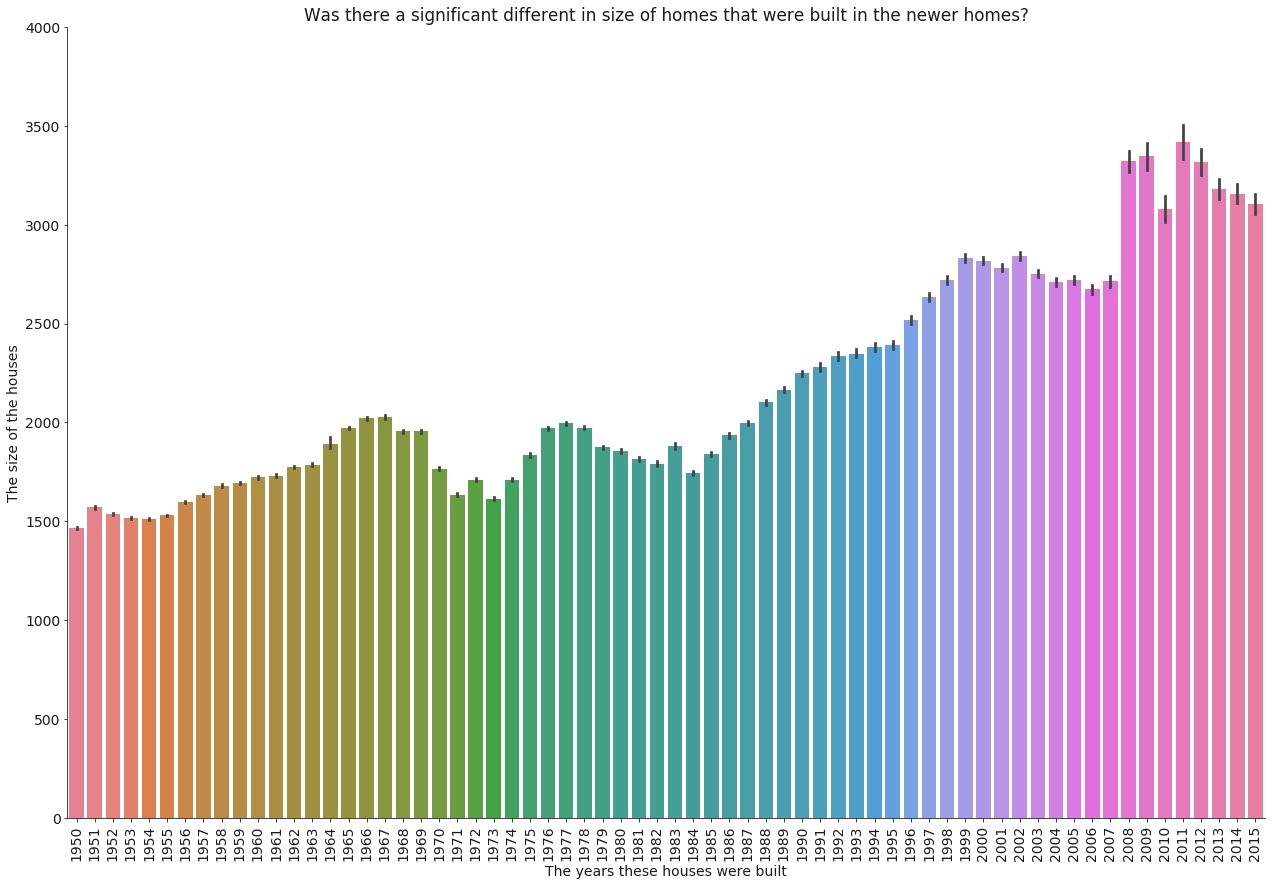

In [78]:
sns.factorplot(x="yearbuilt", y= 'calculatedfinishedsquarefeet', data=zillow_subset, kind="bar",
               palette="husl", size=12, aspect=1.5, order=np.arange(1950, 2016))
plt.ylim(0, 4000)
plt.xticks(rotation = 90)
plt.title('Was there a significant different in size of homes that were built in the newer homes?')
plt.xlabel('The years these houses were built')
plt.ylabel('The size of the houses')
plt.show()

<font color = #800000><I>After viewing all the graphs one can see that difference there is still some correlation between price. The larger difference ended up being from the land value for the newer homes costing more and the size of those homes averaged around a few hundred square feet bigger.</I></font>

### <font color = darkblue><B><I>What are the average prices one pays for a home and how much of that is the price of land?</I></B></font>

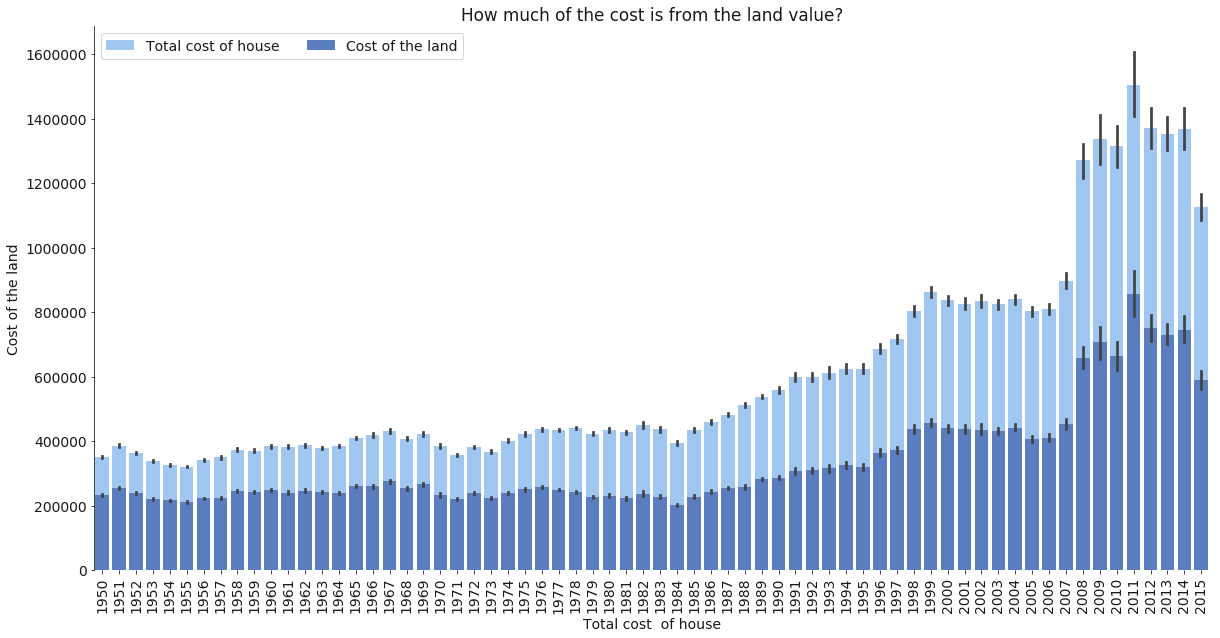

In [76]:
sns.set_color_codes("pastel")
sns.barplot(x="yearbuilt", y='total_value', data=zillow_subset,
            label="Total cost of house", color="b", order=np.arange(1950, 2016))
sns.set_color_codes("muted")
sns.barplot(x="yearbuilt", y="landtaxvaluedollarcnt", data=zillow_subset,
            label="Cost of the land", color="b", order=np.arange(1950, 2016))

plt.legend(ncol=2, loc="upper left", frameon=True)
plt.title('How much of the cost is from the land value?')
plt.xlabel("Total cost  of house")
plt.ylabel("Cost of the land")
plt.xticks(rotation = 90)
sns.despine(left=False, bottom=True)
plt.show()

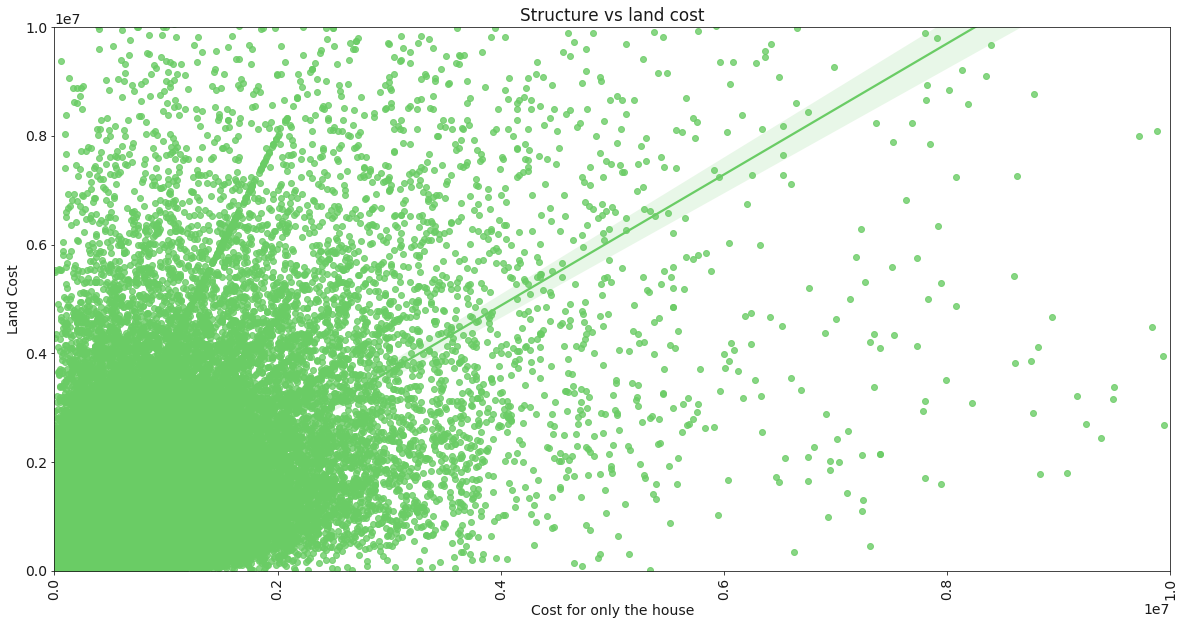

In [82]:
sns.regplot('structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', data= zillow_subset, color="g")
plt.xlim(0, 10000000)
plt.ylim(0, 10000000)
plt.xticks(rotation = 90)
plt.title('Structure vs land cost')
plt.xlabel('Cost for only the house')
plt.ylabel('Land Cost')
plt.show()

<font color = #800000><I>For the homes sold in 2017, the cost of the land contributes a little more than half the total price that the home sold for.</I></font>

<h2><font color = blue><center>Conclusion</center></font></h2>

<font color = #800000><I>My findings concluded that for the areas covered in the zillow 2017 purchased houses dataset showed</I></font>
1. The price of homes were significantly more expensive for homes built after year 2007.
2. There was a trend that shows after 1955 less homes were built; after 2006 and 2007 the                amount of homes being built drops significantly.   
3. There is a trend that shows the later the home was built the larger the home was.
4. The land of the homes built after 2007 was noticably more valuable than the homes built in previous    years.
5. The house per square feet of the house was slightly more valuable than the older homes.
6. A person purchasing a house in 2017 ends up paying a little more for the land than the home itself.